# https://drive.google.com/file/d/1AwHD3ndYfLrwoVilsrA4KcJ4DBB9Z8a/view?usp=sharing
Căn cứ dữ liệu tại đường link trên về thông tin tiêu dùng tập thuê bao trong sáu tháng đầu năm, Anh/Chị hãy phân tích để tìm tập thuê bao tiềm năng giúp gia tăng ARPU (Average Revenue Per User) - Doanh thu trung bình trên một khách hàng.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('max_columns',60)

In [3]:
data=pd.read_table(r'C:\Users\nguye\Downloads\TIEU_DUNG_TB\TIEU_DUNG_TB.tsv')

# 1.Tổng quan dữ liệu

In [4]:
display(data.shape,data.head(2))

(2468683, 35)

,THANG,THUE_BAO,NGAY_KH,TINH,TKC,TKC_THOAI,TKKM_THOAI,TKC_THOAI_ONNET,TKC_THOAI_OFFNET,TKC_GOI_QUOC_TE,TKC_RMNG_OG,TKC_RMNG_IC,TKC_SMS,TKKM_SMS,TKC_SMS_ONNET,TKC_SMS_OFFNET,TKC_KHAC,TKC_VAS,TKC_DATA,TKKM_DATA,TKC_M0,LL_THOAI,LL_ONNET_IC,LL_ONNET_OG,LL_OFFNET_IC,LL_OFFNET_OG,LL_SMS,LL_SMS_ONNET,LL_SMS_OFFNET,LL_DATA,SO_CUOC_GOI,SO_CG_ONNET_IC,SO_CG_ONNET_OG,SO_CG_OFFNET_IC,SO_CG_OFFNET_OG
0,202101,169627400793,25-JUL-20,TP H? Ch� Minh,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,202101,169756804893,09-DEC-20,H� N?i,109154.5,2621.5,0.0,736.0,1885.5,0.0,0,0,799.0,0.0,99.0,700.0,0.0,0.0,105734.0,0.28,28734.0,191,0,64,0,77,10,1,5,892112175,6,0,1,0,4


### -> Nhận xét: Tập dữ liệu gồm 2468683 dòng và 35 cột

In [5]:
#Thêm dòng tính tổng của từng cột (từ cột "TKC" trở đi vì đây là các cột giá trị value)
li=[0,0,0,0]
for i in data.columns[4:]:
    li.append(sum(data[i]))
li1=pd.DataFrame(li).transpose()
li1.columns=data.columns
data_sum=pd.concat([data,li1],axis=0)
data_sum[-1:]

,THANG,THUE_BAO,NGAY_KH,TINH,TKC,TKC_THOAI,TKKM_THOAI,TKC_THOAI_ONNET,TKC_THOAI_OFFNET,TKC_GOI_QUOC_TE,TKC_RMNG_OG,TKC_RMNG_IC,TKC_SMS,TKKM_SMS,TKC_SMS_ONNET,TKC_SMS_OFFNET,TKC_KHAC,TKC_VAS,TKC_DATA,TKKM_DATA,TKC_M0,LL_THOAI,LL_ONNET_IC,LL_ONNET_OG,LL_OFFNET_IC,LL_OFFNET_OG,LL_SMS,LL_SMS_ONNET,LL_SMS_OFFNET,LL_DATA,SO_CUOC_GOI,SO_CG_ONNET_IC,SO_CG_ONNET_OG,SO_CG_OFFNET_IC,SO_CG_OFFNET_OG
0,0.0,0.0,0.0,0.0,1.394080e+11,5.911690e+10,6.230300e+09,1.453970e+10,2.986321e+10,256983.1,97375000.0,129834000.0,5.210840e+09,4.022754e+08,1.163585e+09,2.486324e+09,6.121889e+08,2.149468e+10,5.294438e+10,4.270873e+07,8.127200e+09,1.221738e+10,4.063989e+09,3.771368e+09,2.203364e+09,2.055671e+09,325757972.0,8893173.0,15381406.0,1.189641e+16,173491555.0,47802184.0,45512574.0,39938516.0,38723313.0


### Doanh thu / 1 số tài khoản / tháng (dữ liệu được chốt theo từng tháng ):

In [293]:
data['TKC'].sum()/len(data)

56470.58416840023

### Doanh thu / 1 số thuê bao ( tính theo sự riêng biệt của thuê bao, không tính theo thời gian)

In [298]:
data['TKC'].sum()/len(data['THUE_BAO'].unique())

288127.05622207

## Tìm đặc điểm của các số thuê bao mang lại doanh thu cao nhất:
(lấy mẫu 10% các thuê bao có doanh thu cao nhất)

In [351]:
dt_1tb=data.groupby('THUE_BAO')['TKC'].sum()
top=dt_1tb.sort_values(ascending=False)[:int(len(dt_1tb)/10)]
top

THUE_BAO
169831136193    2.878950e+07
169678839493    2.836213e+07
169837968793    2.678356e+07
169822411093    2.474923e+07
169836053393    2.427578e+07
                    ...     
169719662893    7.303493e+05
169825163593    7.303450e+05
169893149493    7.303185e+05
169624367193    7.303084e+05
169899255393    7.302720e+05
Name: TKC, Length: 48384, dtype: float64

In [374]:
top.sum()/data['TKC'].sum()

0.43321248407404395

## Như vậy, chỉ 10% số thuê bao này đã mang lại 43.32% tổng doanh thu cả nước

## Xét 48384  thuê bao (Top 10% các thuê bao có doanh thu cao nhất) thuộc các tỉnh thành nào?? 

In [361]:
li=[set(data[data['THUE_BAO']==i]['TINH']) for i in top.index] ###code này chạy khá lâu, 

Text(0.5, 1.0, 'TOP 10 tỉnh thành có số lượng thuê bao thuộc TOP10 doanh thu')

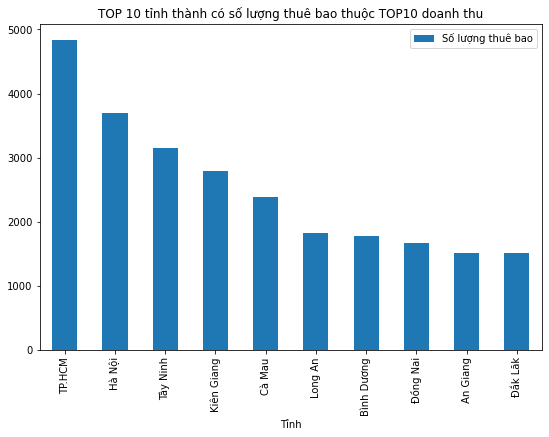

In [476]:
li_s=sorted([(list(i))[0] for i in li])
dic={i:li_s.count(i) for i in set(li_s)}
sort=sorted(list(dic.items()),key=lambda x: x[1])
top_10=sort[:-11:-1]
top_10_tb=pd.DataFrame(top_10,columns=['Tỉnh','Số lượng thuê bao'])
top_10_tb[['Tỉnh','Số lượng thuê bao']].plot(x='Tỉnh',kind='bar',figsize=(9,6))
plt.xticks(np.arange(10),['TP.HCM', 'Hà Nội','Tây Ninh','Kiên Giang','Cà Mau','Long An','Bình Dương','Đồng Nai',' An Giang','Đắk Lăk'])
plt.title('TOP 10 tỉnh thành có số lượng thuê bao thuộc TOP10 doanh thu')

## Như vậy Top_10 thuê bao (48384 thuê bao) nằm chủ yếu ở 10 tỉnh thành này (số lượng thuê bao Top_10 ở 10 tỉnh này là 25158 thuê bao) )
['TP.HCM', 'Hà Nội','Cà Mau','Tây Ninh','Kiên Giang','Bình Dương',' An Giang','Long An','Đồng Nai','Đắk Lăk']

## Tiếp tục tìm 10 tỉnh  có tổng Doanh thu cao nhất

In [454]:
Top10_tinh=data_tinh.sort_values(ascending=False)[:10]
Top10_tinh
Top10_tinh.set_axis(['TP.HCM', 'Hà Nội','Cà Mau','Tây Ninh','Kiên Giang','Bình Dương','Bạc Liêu','Quảng Trị','Đồng Nai','Đắk Lăk'])

TP.HCM        1.305139e+10
Hà Nội        1.009988e+10
Cà Mau        7.222522e+09
Tây Ninh      6.797700e+09
Kiên Giang    6.328484e+09
Bình Dương    5.688720e+09
Bạc Liêu      4.508612e+09
Quảng Trị     4.499631e+09
Đồng Nai      4.405179e+09
Đắk Lăk       4.280513e+09
Name: TKC, dtype: float64

In [480]:
Top10_tinh.sum()/data['TKC'].sum()

0.4797618805274048

## 10 tỉnh có doanh thu cao nhất chiếm 47,97% tổng doanh thu cả nước

([<matplotlib.axis.XTick at 0x28a49828970>,
 [Text(0, 0, 'TP.HCM'),
  Text(1, 0, 'Hà Nội'),
  Text(2, 0, 'Cà Mau'),
  Text(3, 0, 'Tây Ninh'),
  Text(4, 0, 'Kiên Giang'),
  Text(5, 0, 'Bình Dương'),
  Text(6, 0, 'Bạc Liêu'),
  Text(7, 0, 'Quảng Trị'),
  Text(8, 0, 'Đồng Nai'),
  Text(9, 0, 'Đắk Lăk')])

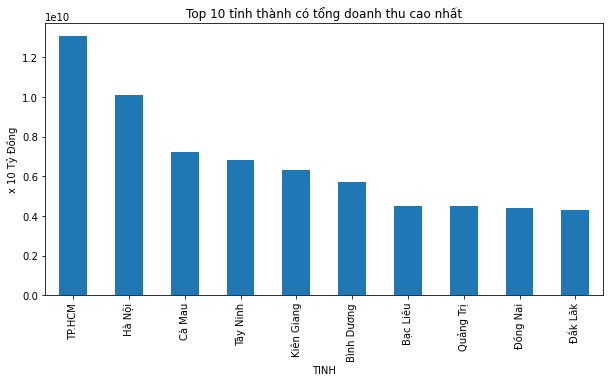

In [474]:
data_tinh=data.groupby('TINH')['TKC'].sum()
data_tinh.sort_values(ascending=False)[:10].plot(kind='bar',figsize=(10,5))
plt.title('Top 10 tỉnh thành có tổng doanh thu cao nhất')
plt.ylabel('x 10 Tỷ Đồng')
plt.xticks(np.arange(10),['TP.HCM', 'Hà Nội','Cà Mau','Tây Ninh','Kiên Giang','Bình Dương','Bạc Liêu','Quảng Trị','Đồng Nai','Đắk Lăk'])

## Dưới đây là biểu đồ Doanh thu tính theo mốc năm hòa mạng

([<matplotlib.axis.XTick at 0x28a4719ae80>,
 [Text(0, 0, '2000'),
  Text(1, 0, '2001'),
  Text(2, 0, '2002'),
  Text(3, 0, '2003'),
  Text(4, 0, '2004'),
  Text(5, 0, '2005'),
  Text(6, 0, '2006'),
  Text(7, 0, '2007'),
  Text(8, 0, '2008'),
  Text(9, 0, '2009'),
  Text(10, 0, '2010'),
  Text(11, 0, '2011'),
  Text(12, 0, '2012'),
  Text(13, 0, '2013'),
  Text(14, 0, '2014'),
  Text(15, 0, '2015'),
  Text(16, 0, '2016'),
  Text(17, 0, '2017'),
  Text(18, 0, '2018'),
  Text(19, 0, '2019'),
  Text(20, 0, '2020'),
  Text(21, 0, '2021'),
  Text(22, 0, '1999')])

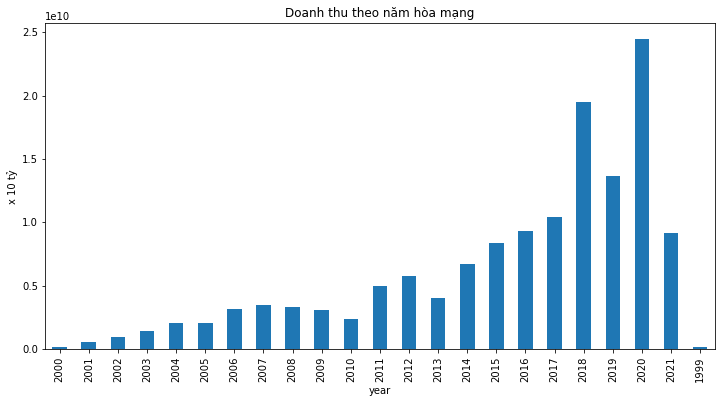

In [111]:
data['year']=data['NGAY_KH'].str[-2:]
data.groupby('year')['TKC'].sum().plot(kind='bar',figsize=(12,6))
plt.title('Doanh thu theo năm hòa mạng')
plt.ylabel('x 10 tỷ')
plt.xticks(np.arange(23),[2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,1999])

## -> Các thuê bao hòa mạng vào năm 2018,2019,2020 mang lại doanh thu cao nhất

## Dưới đây là một số Biểu đồ tổng quát dữ liệu theo thời gian

Text(0.5, 1.0, 'TKKM theo tháng')

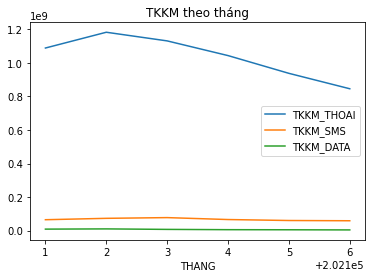

In [70]:
data.groupby('THANG')[['TKKM_THOAI','TKKM_SMS','TKKM_DATA']].sum().plot()
plt.title('TKKM theo tháng')

Text(0.5, 1.0, 'Lưu lượng theo tháng')

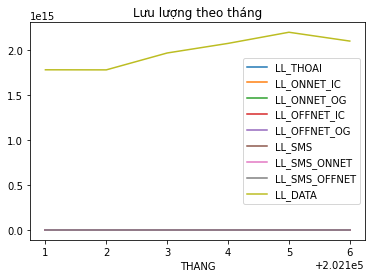

In [71]:
data.groupby('THANG')[['LL_THOAI', 'LL_ONNET_IC', 'LL_ONNET_OG', 'LL_OFFNET_IC',
       'LL_OFFNET_OG', 'LL_SMS', 'LL_SMS_ONNET', 'LL_SMS_OFFNET', 'LL_DATA']].sum().plot()
plt.title('Lưu lượng theo tháng')

Text(0.5, 1.0, 'Số cuộc gọi theo tháng')

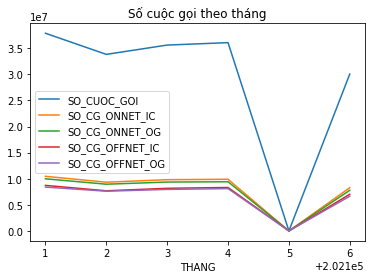

In [112]:
data.groupby('THANG')[['SO_CUOC_GOI', 'SO_CG_ONNET_IC', 'SO_CG_ONNET_OG', 'SO_CG_OFFNET_IC',
       'SO_CG_OFFNET_OG']].sum().plot()
plt.title('Số cuộc gọi theo tháng')

In [478]:
{'TP.HCM', 'Hà Nội','Tây Ninh','Kiên Giang','Cà Mau','Long An','Bình Dương','Đồng Nai',' An Giang','Đắk Lăk','TP.HCM', 'Hà Nội','Cà Mau','Tây Ninh','Kiên Giang','Bình Dương','Bạc Liêu','Quảng Trị','Đồng Nai','Đắk Lăk'}

{' An Giang',
 'Bình Dương',
 'Bạc Liêu',
 'Cà Mau',
 'Hà Nội',
 'Kiên Giang',
 'Long An',
 'Quảng Trị',
 'TP.HCM',
 'Tây Ninh',
 'Đắk Lăk',
 'Đồng Nai'}

# KẾT LUẬN: Như vậy, có thể thấy các thuê bao mang lại doanh thu lớn nhất có 2 đặc điểm lớn:
1. Thuộc các tỉnh thành:  ('An Giang','Bình Dương','Bạc Liêu','Cà Mau','Hà Nội','Kiên Giang','Long An','Quảng Trị','TP.HCM','Tây Ninh','Đắk Lăk','Đồng Nai'). 
1.1. Số lượng 48384 thuê bao ( 10% tổng số thuê bao), mà chủ yếu ở các tỉnh này đã chiếm 43.32% tổng doanh thu cả nước
1.2. Tổng doanh thu 10 tỉnh có doanh thu cao nhất chiếm 47,97% tổng doanh thu cả nước
2. Các thuê bao hòa mạng vào năm 2018,2019,2020 mang lại doanh thu cao nhất

# 2. Phân tích dữ liệu theo thời gian  (từng tháng)

## Mức Doanh thu trung bình trên 1 thuê bao (tính tổng dữ liệu)

In [215]:
data_thang=data.groupby('THANG')['TKC'].agg([sum,len])
data_thang.rename(columns={'sum':'Doanh thu','len':'THUE_BAO'},inplace=True)
data_thang['Doanh_thu/1_Thue_bao']=data_thang['Doanh thu']/data_thang['THUE_BAO']
data_thang.reset_index(inplace=True)

In [216]:
data_thang

,THANG,Doanh thu,THUE_BAO,Doanh_thu/1_Thue_bao
0,202101,2.325857e+10,404378.0,57516.908821
1,202102,2.248357e+10,400685.0,56112.838987
2,202103,2.412356e+10,409891.0,58853.591860
3,202104,2.398452e+10,411033.0,58351.808842
4,202105,2.323449e+10,421337.0,55144.673597
5,202106,2.232326e+10,421359.0,52979.188028


Text(0.5, 1.0, 'Số thuê bao 6 tháng đầu năm 2021')

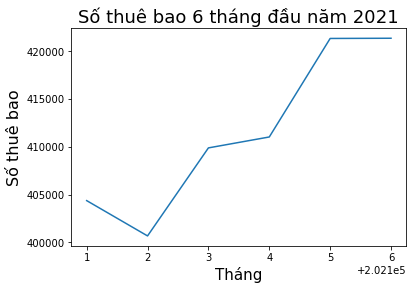

In [182]:
#Vẽ biểu đồ thể hiện số lượng thuê bao biến động theo tháng
data_thang['THUE_BAO'].plot()
plt.xlabel('Tháng',fontsize=15)
plt.ylabel('Số thuê bao', fontsize=16)
plt.title("Số thuê bao 6 tháng đầu năm 2021", fontsize=18)

## -> Nhận xét: Từ tháng 1 đến tháng 6, số lượng thuê bao có xu hướng tăng dần

Text(0.5, 1.0, 'Doanh thu 6 tháng đầu năm 2021')

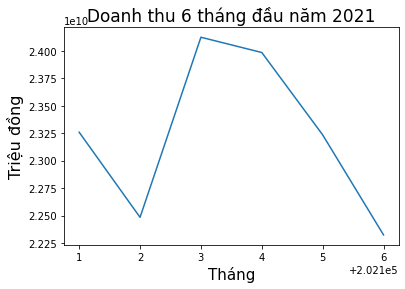

In [183]:
#Tính doanh thu theo từng tháng
data_thang['Doanh thu'].plot()
plt.xlabel('Tháng',fontsize=15)
plt.ylabel('Triệu đồng', fontsize=16)
plt.title("Doanh thu 6 tháng đầu năm 2021", fontsize=17)

## -> Nhận xét: Doanh thu đạt đỉnh tháng 3 rồi giảm dần 

Text(0.5, 1.0, 'Doanh thu/1 thuê bao 6 tháng đầu năm 2021')

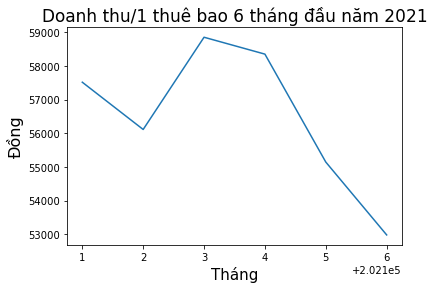

In [11]:
data.groupby('THANG').apply(lambda x: sum(x['TKC'])/len(x['THUE_BAO'])).plot()
plt.xlabel('Tháng',fontsize=15)
plt.ylabel('Đồng', fontsize=16)
plt.title("Doanh thu/1 thuê bao 6 tháng đầu năm 2021", fontsize=17)

## -> Nhận xét: Như vậy lượng thuê bao tăng nhưng không làm doanh thu tăng

# 3. Phân tích 20% số thuê bao chiếm doanh thu cao nhất

## Bây giờ chúng ta sẽ chia dữ liệu thành 6 phần (theo từng tháng) rồi lấy 20% của từng tập dữ liệu con (theo tiêu chí 20%TKC cao nhất từng tập), sau đó tìm xem loại TKC nào chiếm tỷ trọng cao nhất và xu hướng ra sao

In [52]:
#Chia data thành 6 data con theo từng tháng, rồi sắp xếp từng data con theo 'TKC' giảm dần,
#để lấy 20% từng data con theo 'TKC' cao nhất
# li_month=['data_t1','data_t2','data_t3','data_t4','data_t5','data_t6']
# for i in li_month:
#      i=data[data['THANG']==int('20210'+i[-1])]
#      i.sort_values('TKC',ascending=False,inplace=True)
#      i=i[:(int(len(i)/5))]
data_t1=data[data['THANG']==202101]    
data_t1.sort_values('TKC',ascending=False,inplace=True)
data_t1=data_t1[:(int(len(data_t1)/5))]

data_t2=data[data['THANG']==202102]    
data_t2.sort_values('TKC',ascending=False,inplace=True)
data_t2=data_t2[:(int(len(data_t2)/5))]

data_t3=data[data['THANG']==202103]    
data_t3.sort_values('TKC',ascending=False,inplace=True)
data_t3=data_t3[:(int(len(data_t3)/5))]

data_t4=data[data['THANG']==202104]    
data_t4.sort_values('TKC',ascending=False,inplace=True)
data_t4=data_t4[:(int(len(data_t4)/5))]

data_t5=data[data['THANG']==202105]    
data_t5.sort_values('TKC',ascending=False,inplace=True)
data_t5=data_t5[:(int(len(data_t5)/5))]

data_t6=data[data['THANG']==202106]    
data_t6.sort_values('TKC',ascending=False,inplace=True)
data_t6=data_t6[:(int(len(data_t6)/5))]

<ipython-input-52-74ab36352581>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_t1.sort_values('TKC',ascending=False,inplace=True)
<ipython-input-52-74ab36352581>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_t2.sort_values('TKC',ascending=False,inplace=True)
<ipython-input-52-74ab36352581>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_t3.sort_values('TKC',ascending=False,inplace=True)
<ipython-input-52-74ab3635

## Dưới đây là các biểu đồ tỷ lệ các loại TKC theo từng tháng

In [58]:
cac_TKC=['TKC_THOAI','TKC_GOI_QUOC_TE','TKC_RMNG_OG', 'TKC_RMNG_IC', 'TKC_SMS',
                                'TKC_KHAC', 'TKC_VAS', 'TKC_DATA']

sum_TKC_t1=[sum(data_t1[i]) for i in cac_TKC]
sum_TKC_t2=[sum(data_t2[i]) for i in cac_TKC]
sum_TKC_t3=[sum(data_t3[i]) for i in cac_TKC]
sum_TKC_t4=[sum(data_t4[i]) for i in cac_TKC]
sum_TKC_t5=[sum(data_t5[i]) for i in cac_TKC]
sum_TKC_t6=[sum(data_t6[i]) for i in cac_TKC]

In [59]:
#Lập bảng chi tiết các loại TKC qua từng tháng
df1=pd.DataFrame(sum_TKC_t1,index=cac_TKC)
df2=pd.DataFrame(sum_TKC_t2,index=cac_TKC)
df3=pd.DataFrame(sum_TKC_t3,index=cac_TKC)
df4=pd.DataFrame(sum_TKC_t4,index=cac_TKC)
df5=pd.DataFrame(sum_TKC_t5,index=cac_TKC)
df6=pd.DataFrame(sum_TKC_t6,index=cac_TKC)
df_month=pd.concat([df1,df2,df3,df4,df5,df6],axis=1)
df_month=df_month.T
df_month.index=['Thang1','Thang2','Thang3','Thang4','Thang5','Thang6']
df_month

,TKC_THOAI,TKC_GOI_QUOC_TE,TKC_RMNG_OG,TKC_RMNG_IC,TKC_SMS,TKC_KHAC,TKC_VAS,TKC_DATA
Thang1,6.347327e+09,39399.8,9180000.0,12519000.0,5.635791e+08,6.727728e+07,2.578554e+09,5.445869e+09
Thang2,5.450909e+09,0.0,7932000.0,8153000.0,5.017306e+08,6.842094e+07,2.810490e+09,5.454890e+09
Thang3,6.374881e+09,0.0,17363000.0,26695000.0,6.644958e+08,8.900078e+07,2.553679e+09,5.753733e+09
Thang4,6.232026e+09,0.0,19321000.0,28098000.0,7.830835e+08,8.085647e+07,2.514426e+09,5.736654e+09
Thang5,5.976927e+09,203784.9,21172000.0,30148000.0,6.802566e+08,7.553941e+07,2.623024e+09,5.754705e+09
Thang6,5.565658e+09,0.0,20758200.0,21263000.0,7.977172e+08,3.054116e+07,2.792191e+09,5.571936e+09


Text(0.5, 1.0, 'Tỷ lệ doanh thu các loại TKC tháng 1')

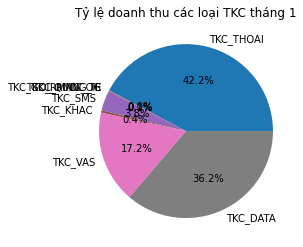

In [60]:
plt.pie(sum_TKC_t1,labels=cac_TKC,autopct = '%1.1f%%')
plt.title('Tỷ lệ doanh thu các loại TKC tháng 1')

Text(0.5, 1.0, 'Tỷ lệ doanh thu các loại TKC tháng 2')

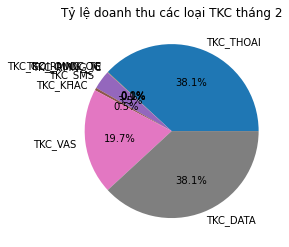

In [61]:
plt.pie(sum_TKC_t2,labels=cac_TKC,autopct = '%1.1f%%')
plt.title('Tỷ lệ doanh thu các loại TKC tháng 2')

Text(0.5, 1.0, 'Tỷ lệ doanh thu các loại TKC tháng 3')

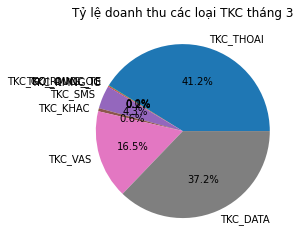

In [62]:
plt.pie(sum_TKC_t3,labels=cac_TKC,autopct = '%1.1f%%')
plt.title('Tỷ lệ doanh thu các loại TKC tháng 3')

Text(0.5, 1.0, 'Tỷ lệ doanh thu các loại TKC tháng 4')

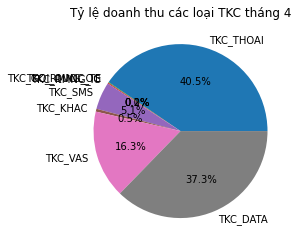

In [63]:
plt.pie(sum_TKC_t4,labels=cac_TKC,autopct = '%1.1f%%')
plt.title('Tỷ lệ doanh thu các loại TKC tháng 4')

Text(0.5, 1.0, 'Tỷ lệ doanh thu các loại TKC tháng 5')

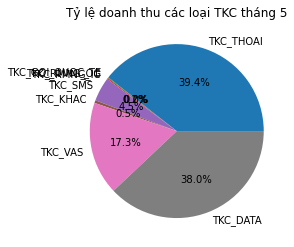

In [64]:
plt.pie(sum_TKC_t5,labels=cac_TKC,autopct = '%1.1f%%')
plt.title('Tỷ lệ doanh thu các loại TKC tháng 5')

Text(0.5, 1.0, 'Tỷ lệ doanh thu các loại TKC tháng 6')

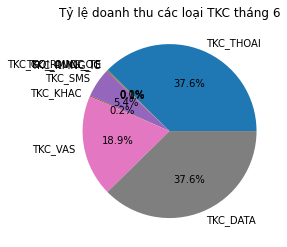

In [65]:
plt.pie(sum_TKC_t6,labels=cac_TKC,autopct = '%1.1f%%')
plt.title('Tỷ lệ doanh thu các loại TKC tháng 6')

Text(0.5, 1.0, 'Biến động Doanh thu trong 6 tháng')

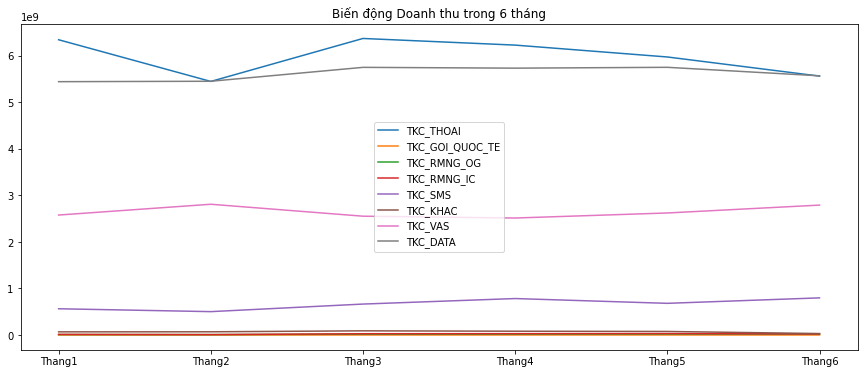

In [66]:
df_month.plot(figsize=(15,6))
plt.title('Biến động Doanh thu trong 6 tháng')

## -> Nhận xét: 'TKC_THOAI','TKC_DATA','TKC_VAS' là 3 loại doanh thu chiểm tỷ trọng cao nhất trong cơ cấu doanh thu 6 tháng. Trải qua 6 tháng, 3 loại doanh thu này không có biến động nhiều. 'TKC_THOAI' có xu hướng giảm; TKC_DATA ổn định và TKC_VAS đang có xu hướng tăng

## Sau đây, tính chi tiết các loại doanh thu trên một thuê bao, theo từng tháng

In [67]:
aver1=[i/len(data_t1) for i in sum_TKC_t1]
aver2=[i/len(data_t2) for i in sum_TKC_t2]
aver3=[i/len(data_t3) for i in sum_TKC_t3]
aver4=[i/len(data_t4) for i in sum_TKC_t4]
aver5=[i/len(data_t5) for i in sum_TKC_t5]
aver6=[i/len(data_t6) for i in sum_TKC_t6]
dfa1=pd.DataFrame(aver1,index=cac_TKC)
dfa2=pd.DataFrame(aver2,index=cac_TKC)
dfa3=pd.DataFrame(aver3,index=cac_TKC)
dfa4=pd.DataFrame(aver4,index=cac_TKC)
dfa5=pd.DataFrame(aver5,index=cac_TKC)
dfa6=pd.DataFrame(aver6,index=cac_TKC)
df_month_aver=pd.concat([dfa1,dfa2,dfa3,dfa4,dfa5,dfa6],axis=1)
df_month_aver=df_month_aver.T
df_month_aver.index=['Thang1','Thang2','Thang3','Thang4','Thang5','Thang6']
df_month_aver

,TKC_THOAI,TKC_GOI_QUOC_TE,TKC_RMNG_OG,TKC_RMNG_IC,TKC_SMS,TKC_KHAC,TKC_VAS,TKC_DATA
Thang1,78483.181261,0.487169,113.508501,154.794436,6968.520146,831.867399,31883.202498,67336.860230
Thang2,68019.877041,0.000000,98.980496,101.738273,6260.911314,853.799613,35071.061930,68069.554516
Thang3,77763.315171,0.000000,211.800727,325.636146,8105.781443,1085.666679,31150.787310,70186.311451
Thang4,75809.871168,0.000000,235.031506,341.799869,9525.867692,983.583582,30586.894496,69783.878622
Thang5,70928.441656,2.418324,251.249006,357.767572,8072.633389,896.429296,31127.536730,68291.320358
Thang6,66044.756138,0.000000,246.326732,252.316930,9466.094401,362.416039,33133.479171,66119.259896


Text(0, 0.5, 'đồng')

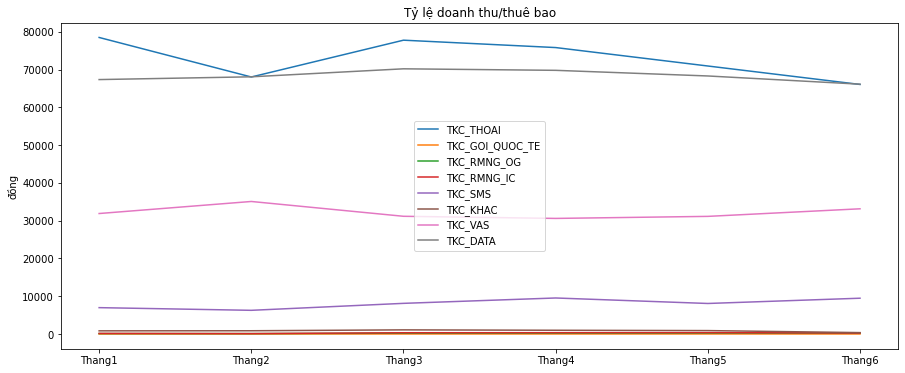

In [68]:
df_month_aver.plot(kind='line', figsize=(15,6))
plt.title('Tỷ lệ doanh thu/thuê bao')
plt.ylabel('đồng')

## -> Nhận xét: Trải qua 6 tháng, các loại doanh thu trên mỗi thuê bao không có biến động nhiều. 'TKC_THOAI' có xu hướng giảm; TKC_DATA ổn định và TKC_VAS đang có xu hướng tăng